## OR-tools example

In [1]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP, ModelOptions

In [2]:
ModelOptions.help()

topology in {"radial", "branched", "branched"} default: branched
    Set the topology of subtrees in the solution.

feeder_route in {"straight", "segmented", "segmented"} default: segmented
    If feeder routes must be "straight" or can be detoured ("segmented").

feeder_limit in {"unlimited", "specified", "minimum", "min_plus1", "min_plus2", "min_plus3", "unlimited"} default: unlimited
    Whether to limit the maximum number of feeders, if set to "specified", additional kwarg "max_feeders" must be given.



### Initialize Moray East

In [3]:
file_path =  '../../optiwindnet/data/Moray East.yaml'
wfn = WindFarmNetwork.from_yaml(filepath=file_path, cables=7)

<Axes: >

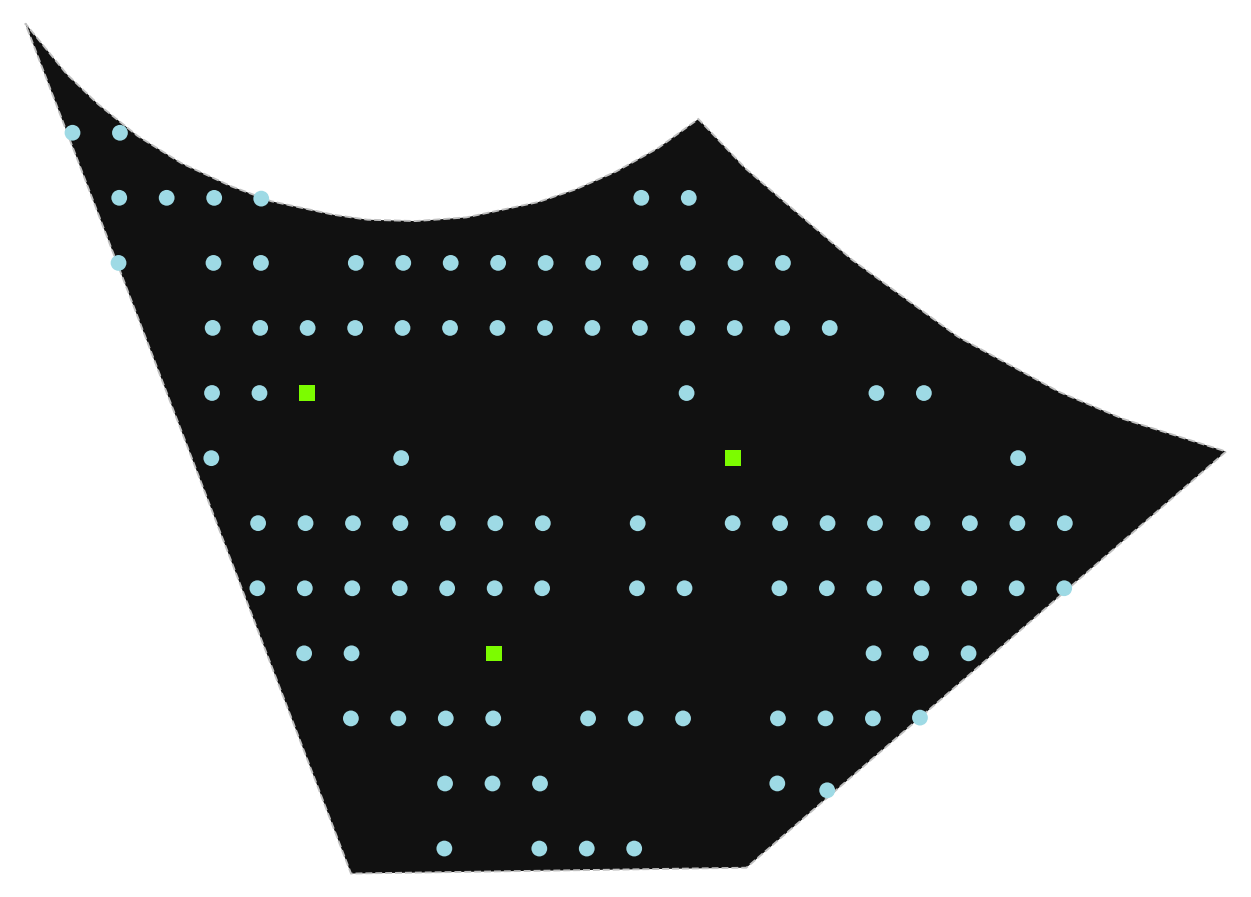

In [4]:
wfn.plot_location()

<Axes: >

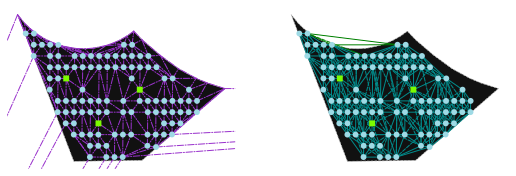

In [5]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['svg.fonttype'] = 'none'
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='none', figsize=(9, 3))
wfn.plot_navigation_mesh(ax=ax1)
wfn.plot_available_links(ax=ax2)

### Optimize Moray East

Initial heuristic solution to warm-start the solver:

In [6]:
model_options = ModelOptions(
                        topology='branched',
                        feeder_limit='unlimited',
                        feeder_route='segmented',
                    )
router_warmstart = Heuristic(solver='Esau_Williams', model_options=model_options) #
res_warmstart= wfn.optimize() # default is Heuristic Esau_Williams


<Axes: >

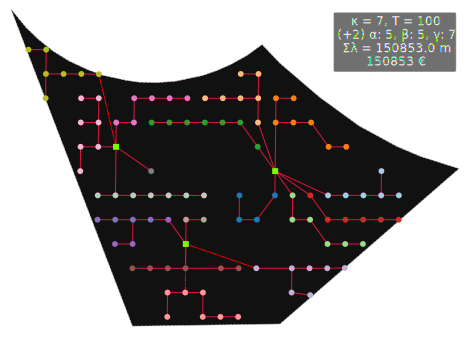

In [7]:
wfn.plot_selected_links()

<Axes: >

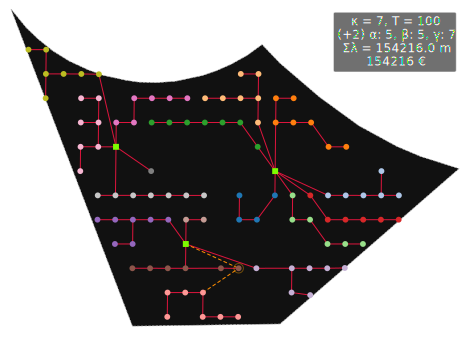

In [8]:
wfn.plot()

In [10]:
solver_options=dict(
    num_workers = 8,
)

model_options = ModelOptions(
                        topology='branched',
                        feeder_limit='unlimited',
                        feeder_route='segmented',
                    )

router = MILP(solver_name='ortools', time_limit=15, mip_gap=0.01, solver_options=solver_options,  verbose=True)
res = wfn.optimize(router=router)

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...

Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 15 log_search_progress: true relative_gap_limit: 0.01 num_workers: 8

Initial optimization model '': (model_fingerprint: 0x7902aab178e159f7)
#Variables: 2'428 (#bools: 1'2

<Axes: >

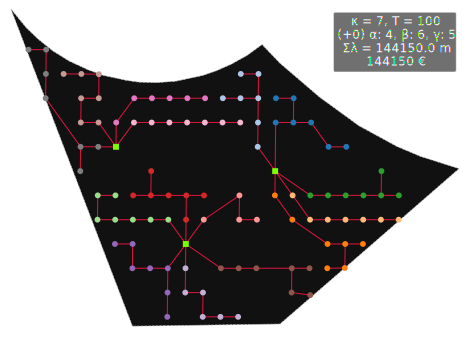

In [11]:
wfn.plot_selected_links()

<Axes: >

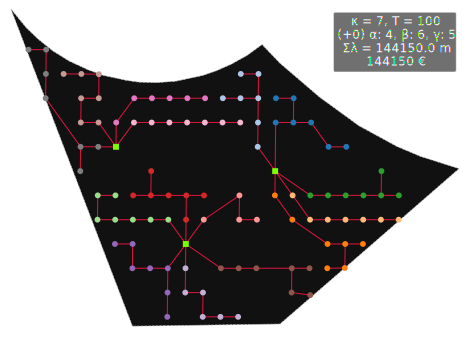

In [12]:
wfn.plot()